# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章 ([neko.txt](https://nlp100.github.io/data/neko.txt)) をMeCabを使って形態素解析し, その結果をneko.txt.mecabというファイルに保存せよ. このファイルを用いて, 以下の問に対応するプログラムを実装せよ.

なお, 問題37, 38, 39は[matplotlib](http://matplotlib.org/)もしくは[Gnuplot](http://www.gnuplot.info/)を用いるとよい.

## 30. 形態素解析結果の読み込み
形態素解析結果 (neko.txt.mecab) を読み込むプログラムを実装せよ. ただし, 各形態素は表層形 (surface), 基本形 (base), 品詞 (pos), 品詞細分類1 (pos1) をキーとするマッピング型に格納し, 1文を形態素 (マッピング型) のリストとして表現せよ. 第4章の残りの問題では, ここで作ったプログラムを活用せよ.

In [1]:
import MeCab

mecab = MeCab.Tagger()
with open("neko.txt", "r") as f1, open("neko.txt.mecab", "w+") as f2:
    lines = f1.readlines()
    for text in lines:
        result = mecab.parse(text)
        f2.write(result)

In [2]:
with open("neko.txt.mecab", "r") as f:
    lines = f.readlines()
    nlist = []
    for text in lines:
        ndict = {}
        suf = text.split("\t")
        if suf[0] == "EOS":
            continue
        if len(suf) > 1:
            tmp = suf[1].split(",")
            ndict["surface"] = suf[0]
            if len(tmp) <= 7:
                ndict["base"] = suf[0]
            else:
                ndict["base"] = tmp[7]
            ndict["pos"] = tmp[0]
            ndict["pos1"] = tmp[1]
            nlist.append(ndict)
            
for item in nlist[:10]: # Due to file size constraints, the output is limited.
    print(item)

{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数詞'}
{'surface': '\u3000', 'base': '\u3000', 'pos': '空白', 'pos1': ''}
{'surface': '吾輩', 'base': '我が輩', 'pos': '代名詞', 'pos1': ''}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '普通名詞'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': ''}
{'surface': 'ある', 'base': '有る', 'pos': '動詞', 'pos1': '非自立可能'}
{'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}
{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '普通名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}


## 31. 動詞
動詞の表層形をすべて抽出せよ.

In [3]:
verbs = {item["surface"] for item in nlist if item["pos"] == "動詞"}
print(verbs)

{'期せ', 'あらわせ', '差し支え', '食べる', '困りゃ', '見付け', '申し聞ける', '思い立っ', 'すくい出し', '瞬く', 'もたし', '舂き', '試みる', '数え立て', '交ぜ返し', '釣ら', 'あたわ', '焚け', '叙し', '振り翳し', '蘇える', '話し', '復する', '縊り', '於け', '通り抜け', '当ら', '起き返っ', '直さ', '考え直し', '懸る', '為す', '尖がっ', '了り', 'まえ', '折れん', '引か', '働い', 'すべっ', '生', '行か', '上す', '含まっ', 'とれる', '振り廻す', '言いあらわせ', '与え', '擦り付け', 'はめ', '脱ぎ棄てる', 'ぬから', '呈し', 'つん', 'つかえる', '言う', '較べる', '出直そう', 'け出し', '溜ら', '責め', '飛び込もう', '承わっ', '打ち明ける', '疑ぐる', '失う', '運ん', '先っ', '縫い合せ', '休ん', 'とりかかる', '磨し', '外れ', '見習おう', '捻る', '致し', '飛', '嗅い', '乗りゃ', '片づけ', '装っ', '交り', '覆せ', '見付かる', '売り', '戒め', '言い触らす', 'しでかす', '訴える', '倒れ', 'まぜ返し', '入り乱れ', 'なで', 'きめ込む', '括りつけ', '余っ', '片づか', '逃げ出す', 'ねじり', 'のめり', '比べる', '来たし', '持たし', '有り', '打っちゃら', '限る', '違う', '着い', '見廻っ', '取り乱さ', '嘲り', '差しかかっ', '嚇かせ', '落ちつけ', '透き徹っ', '張り上げ', '聞き', 'もぐり込む', '延び', '応ずる', '片付ける', '差し', '塊まっ', '騒い', '関せ', '燃え', '見出し', '持つ', '下り', '終る', '飛ん', '詐る', '来よう', 'ぶっ切ら', 'しきら', '出張っ', '伴れ', '肥っ', '睨み合っ', '吹き付け', '用いる', '追い出し', 'くだけ', '放さ', '了っ', '聴い'

## 32. 動詞の基本形
動詞の基本形をすべて抽出せよ.

In [4]:
verbs = {item["base"] for item in nlist if item["pos"] == "動詞"}
print(verbs)

{'魅入られる', '当てる', '食べる', '申し聞ける', '考え直す', '瞬く', '逸らす', '試みる', '届ける', '焚き出す', '照り付ける', '差し掛かる', '撓う', '干す', '日暮れる', '打ち留める', '復する', '面する', '締め付ける', '迷わす', 'ふける', '浮き出す', '上す', '頂く', '仰せる', '吸い取る', '言う', '失う', '打ち明ける', '濁る', '尽かす', '捻る', '捩じ伏せる', '圧する', '生やす', '見積もる', '取り合う', '繰る', '歩み寄る', '見付かる', '言い触らす', '取り除ける', '訴える', '刻する', '逃げ出す', '詫びる', '比べる', '著わす', '結い巡らせる', '明け放す', '持たす', '捌ける', '違う', '限る', '火照る', '加わる', '見逃す', '踏み出す', '映し出す', '堪る', '応ずる', '駆け回る', '片付ける', '撥ねる', '持つ', '抱え込む', '座する', '外れる', '焦らせる', '用いる', '混ぜ返す', '詰め寄せる', '仄めく', '張り詰める', '突っ伏す', '魂消る', '勝る', '撫で下ろす', '舞い戻る', '打ち取る', '潜る', '喫する', '握る', '唸る', 'ぶら下がる', '出す', '生きる', '貪る', '生まれる', '置く', '拭き込む', '逃れる', '張り付ける', '焦る', '聞き齧る', '灯る', '打つ', '頼む', '沸き上がる', '思い止まる', '素っ破抜く', '纏わる', '締める', '鋳る', '覆す', '占める', '勤まる', '渡る', '舂く', '誤る', '引っ掛かる', '取り止める', '参る', '罵る', '書き入れる', '縫う', '盛る', '引き手繰る', '突き出す', '放り込む', '投げる', '引き渡す', '解き捨てる', '触れる', '平伏す', '起きる', '蘇る', '味わう', '分かれる', '裏返す', '恐れる', '据える', '有する', '申し添える', '増す', '出向く', '黙る'

## 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ.

In [5]:
fp = []
for i in range(1, len(nlist)-1):
    if nlist[i-1]["pos"] == "名詞" and nlist[i+1]["pos"] == "名詞" and nlist[i]["surface"] == "の":
        fp.append(nlist[i-1]["surface"] + nlist[i]["surface"] + nlist[i+1]["surface"])

print(fp)

['掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '藁の上', '笹原の中', '池の前', '一樹の蔭', '垣根の穴', '隣家の三毛', '時の通路', '一刻の猶予', '家の内', '以外の人間', '前の書生', '胸の痞', '家の主人', '主人の方', 'なしの小猫', '鼻の下', '自分の住家', '家のもの', 'うちのもの', '本の上', '皮膚の色', '本の上', '以外のもの', '主人の傍', '膝の上', '経験の上', '飯櫃の上', '炬燵の上', 'うちの小供', '小供の寝床', '小供の一人', '例の神経', '次の部屋', '自分の勝手', 'へっついの中', '台所の板の間', '家の書生', '裏の池', '親子の愛', '隣りの三毛', '目刺の頭', '鰡の臍', '軍人の家', '代言の主人', '教師の家', '猫の時節', '家の主人', '胃弱の癖', '後架の中', '平の宗盛', '月の月給', '主人の述懐', '金縁の眼鏡', '主人の顔', '室内の想像', '訳のもの', '利の大家', '金縁の裏', '顔のあたり', '上乗の出来', '顔の造作', '他の猫', '斑入りの皮膚', '主人の彩色', '一種の色', '身内の筋肉', '主人の予定', '座敷の中', '人の気', '自己の力量', '人間の不徳', '家の裏', 'うちの小供', '日の二', 'たこの茶園', '茶の木', '木の根', '西側の杉垣', '杉垣のそば', '他の庭内', '皮膚の上', '柔毛の間', '嘆賞の念', '好奇の心', '小春の風', '杉垣の上', '梧桐の枝', '枯菊の茂み', '真丸の眼', '人間の珍重', '双眸の奥', '額の上', '声の底', '教師の家', '良家の猫', '車屋の黒', '車屋の黒', '主義の的', '軽侮の念', '左の問答', '車屋の方', 'うちの主人', '車屋の猫', '教師の方', '腹の足し', '車屋の黒', '相当の気焔', '茶畠の中', '黒の比較', '鼻の先', '自分の手柄', '墻壁の欠', '鼠の百', '掃除の時', 'うちの亭主', '石灰の袋',

## 34. 名詞の連接
名詞の連接 (連続して出現する名詞) を最長一致で抽出せよ.

In [6]:
nc = []
tmp = ""
cnt = 0
for i in range(len(nlist)):
    if nlist[i]["pos"] == "名詞":
        if nlist[i]["pos1"] == "数詞" and nlist[i+1]["pos"] == "空白":
            continue
        tmp += nlist[i]["surface"]
        cnt += 1
    else:
        if cnt >= 2:
            nc.append(tmp)
        tmp = ""
        cnt = 0

if tmp:
    nc.append(tmp)

print(nc)

['時妙', '一毛', '後猫', '一度', '上今', 'うち池の上', '左り', '書生以外', '宿なし', 'まま奥', '終日書斎', '時々忍び足', '淡黄色', '二三ページ', '主人以外', '朝主人', '椽側', '一間', '神経胃弱', '時々同衾', '言語同断', '家内総がかり', '先日玉', '一部始終', '新体詩', '後架先生', '一月', '月給日', '水彩絵具', '毎日毎日書斎', '自ら筆', '眼鏡越', '一室内', '以太利', '大家アンドレア', '星辰あり', '禽あり', '金魚あり', '寒鴉あり', '一幅', '椽側', '一分', '淡灰色', '今主人', '上不思議', '盲猫', 'いくらアンドレア', '一分', 'あと大', '馬鹿野郎', '馬鹿野郎', '馬鹿野郎呼わり', '馬鹿野郎', 'みんな増長', '数倍', '十坪', '腹加減', '二時頃', '前後不覚', '少々言葉', '乱暴猫', '同盟敬遠主義', 'ゆき感じ', '少々軽侮', '車屋相当', '不徳事件', '日例', '自慢話し', '手柄話', '年が年', '一度いたち', '最後っ屁', '百年', '五銭', '壱円五十銭', '少々気味', '鼠以外', '水彩画', '十二月一日', '水彩画', '水彩画家', '水彩画', '通人論', '水彩画', '主人はかく', '十二月四', '水彩画', '通り下手', '水彩画', '水彩画家', '水彩画', '翌日例', '金縁眼鏡', '結果今日', 'アンドレア', '椽側', 'サルト事件', '時々冗談', '仏国革命', '日本文学会', '演説会', '百名', '歴史小説セオファーノ', '歴史小説', '女主人', '神経胃弱', '時ゃ別', '模様画', '実際奇警', '半分降参', '後跛', '最後屁', '天秤棒', '二三段', '三間半', '椽側', '毎日学校', '元朝早々主人', '絵端書', '交友某画家', '深緑り', '一応感服', '三世相', '絵端書', '絵端書', 'いくら猫', '一列一体', '自家固有', '張り具合', '垂れ加減', '粋無粋', '千差万別

## 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め, 出現頻度の高い順に並べよ.

In [7]:
from collections import Counter

words = []
for i in range(len(nlist)):
    if all(nlist[i]["pos"] != x for x in ("助詞", "助動詞", "補助記号")):
        words.append(nlist[i]["surface"])

print(Counter(words))

Counter({'し': 2471, 'ある': 1726, 'ない': 1314, 'いる': 1255, '事': 1212, 'する': 1055, 'もの': 973, '君': 971, '云う': 937, '主人': 934, '何': 715, '御': 707, 'よう': 683, 'この': 655, 'その': 620, 'それ': 612, 'そう': 570, '一': 490, '人': 486, '吾輩': 481, 'これ': 472, 'どう': 413, '\u3000': 411, 'なっ': 408, 'さん': 401, 'なる': 395, 'い': 383, '来': 383, 'ところ': 383, '見': 366, '時': 351, '迷亭': 343, '方': 321, 'いい': 319, '上': 298, '寒月': 286, '人間': 279, '顔': 277, '先生': 274, '見る': 273, '僕': 270, 'そんな': 259, 'また': 256, '中': 254, 'あり': 247, '云っ': 241, '猫': 238, '三': 238, '気': 233, '思っ': 232, '出来': 232, '出': 231, 'あっ': 221, '今': 221, '二': 217, '細君': 212, '彼': 206, 'なく': 203, '間': 201, '少し': 197, '者': 197, 'しかし': 190, 'あの': 189, 'なら': 179, '自分': 175, 'ちょっと': 171, '頭': 167, '訳': 159, 'ただ': 156, '前': 156, '声': 156, 'いう': 155, 'うち': 155, 'もう': 152, '鼻': 151, '聞い': 150, '私': 150, '知れ': 149, '思う': 149, '男': 149, '日': 147, '知ら': 147, '家': 145, '行っ': 144, 'さ': 142, 'ため': 140, '女': 138, '見え': 136, '大': 134, 'こんな': 131, '誰': 131, 'よく': 131, '

## 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ (例えば棒グラフなど) で表示せよ.

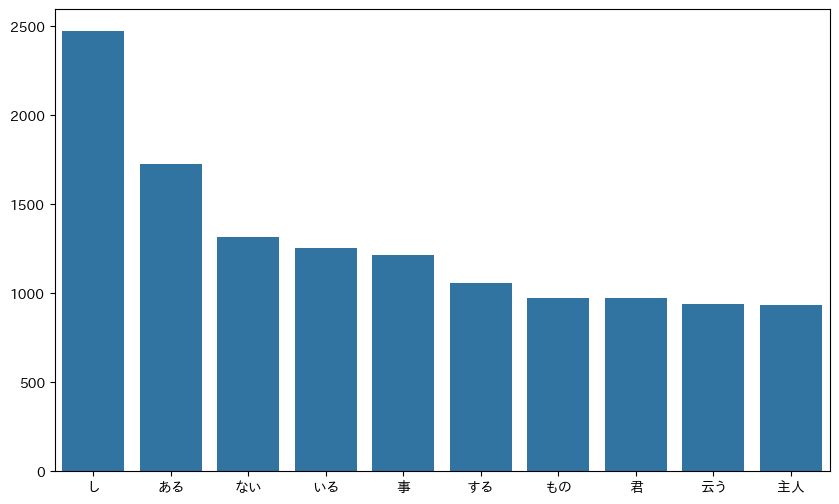

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

mc = Counter(words).most_common(10)
x, y = zip(*mc)

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y)
plt.show()

## 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する (共起頻度が高い) 10語とその出現頻度をグラフ (例えば棒グラフなど) で表示せよ.

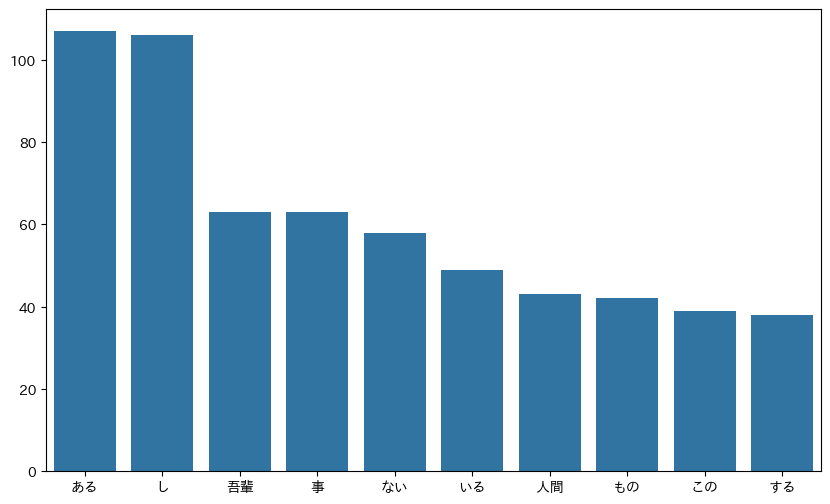

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import Counter
%matplotlib inline

sentense = [[]]
cnt = 0
for i in nlist:
    sentense[cnt].append(i)
    if i["surface"] == "。":
        cnt += 1
        sentense.append([])
  
cat = []
for text in sentense:
    flag = False
    tmp = []
    for mp in text:
        if "猫" in mp["surface"]:
            flag = True
            continue
        if all(mp["pos"] != x for x in ("助詞", "助動詞", "補助記号")):
            tmp.append(mp["surface"])
    if flag:
        cat.append(tmp)

words = list(itertools.chain.from_iterable(cat))
mc = Counter(words).most_common(10)
x, y = zip(*mc)

plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=y)
plt.show()

## 38. ヒストグラム
単語の出現頻度のヒストグラムを描け. ただし, 横軸は出現頻度を表し, 1から単語の出現頻度の最大値までの線形目盛とする. 縦軸はx軸で示される出現頻度となった単語の異なり数 (種類数) である.

In [10]:
from collections import Counter
import plotly.express as px
%matplotlib inline

mc = Counter(Counter(words).values()).most_common()
x, y = zip(*mc)

fig = px.bar(x=x, y=y)
fig.update_layout(
    xaxis=dict(range=[1, 30], title="Frequency"),
    yaxis=dict(title="Word types")
)
fig.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸, その出現頻度を縦軸として, 両対数グラフをプロットせよ.

In [11]:
from collections import Counter
import plotly.express as px
%matplotlib inline

mc = Counter(words).most_common()
_, y = zip(*mc)
order = [i+1 for i in range(len(mc))]

fig = px.scatter(x=order, y=y)
fig.update_layout(
    xaxis=dict(type="log", title="Frequency order"),
    yaxis=dict(type="log", title="Frequency")
)
fig.show()